In [7]:
# Step 1: Import libraries and create/load dataset

import pandas as pd

# Create example dataset (you can skip this if you have your own CSV)
data = {
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'study_hours': [2, 4, 3, 5, 8, 7, 6, 1, 9, 10],
    'attendance': [60, 75, 70, 80, 95, 85, 90, 50, 98, 100],
    'assignments_score': [55, 65, 60, 70, 85, 80, 78, 45, 90, 92],
    'exam_score': [50, 60, 55, 68, 88, 84, 82, 40, 92, 95]
}

df = pd.DataFrame(data)

# Save it as CSV for later use
df.to_csv("student_data.csv", index=False)

print("✅ Dataset created and saved as student_data.csv")
print(df.head())


✅ Dataset created and saved as student_data.csv
   student_id  study_hours  attendance  assignments_score  exam_score
0           1            2          60                 55          50
1           2            4          75                 65          60
2           3            3          70                 60          55
3           4            5          80                 70          68
4           5            8          95                 85          88


In [8]:
# Select only numerical columns
num_df = df.select_dtypes(include=[np.number])
print("Numerical Features:\n", num_df.columns)

# Fill missing values (if any)
num_df = num_df.fillna(num_df.mean())

print("\n✅ Numerical data prepared for clustering")
num_df.head()


Numerical Features:
 Index(['student_id', 'study_hours', 'attendance', 'assignments_score',
       'exam_score'],
      dtype='object')

✅ Numerical data prepared for clustering


,student_id,study_hours,attendance,assignments_score,exam_score
0,1,2,60,55,50
1,2,4,75,65,60
2,3,3,70,60,55
3,4,5,80,70,68
4,5,8,95,85,88


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

print("✅ Data Standardized Successfully")
pd.DataFrame(scaled_data, columns=num_df.columns).head()


✅ Data Standardized Successfully


,student_id,study_hours,attendance,assignments_score,exam_score
0,-1.566699,-1.218544,-1.284373,-1.144062,-1.163594
1,-1.218544,-0.522233,-0.335329,-0.471084,-0.619858
2,-0.870388,-0.870388,-0.651677,-0.807573,-0.891726
3,-0.522233,-0.174078,-0.018981,-0.134595,-0.184870
4,-0.174078,0.870388,0.930063,0.874871,0.902601


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

print("✅ PCA Transformation Done")
pca_df.head()


✅ PCA Transformation Done


,PCA1,PCA2
0,-2.773482,-0.724749
1,-1.307070,-0.865185
2,-1.803079,-0.340855
3,-0.407324,-0.426922
4,1.644939,-0.723627


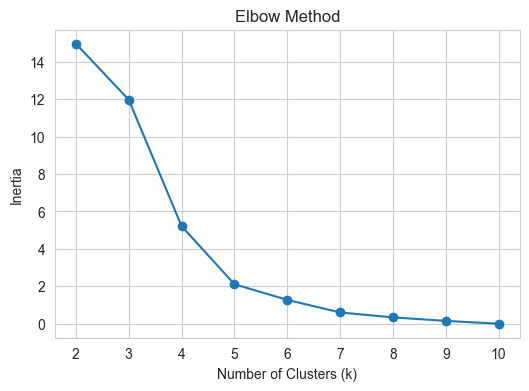

In [11]:
from sklearn.cluster import KMeans

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [12]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"K={k} → Silhouette Score={score:.3f}")


K=2 → Silhouette Score=0.535
K=3 → Silhouette Score=0.244
K=4 → Silhouette Score=0.315
K=5 → Silhouette Score=0.389
K=6 → Silhouette Score=0.335


In [15]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(scaled_data)

print("✅ Clustering Done with K =", optimal_k)
df.head()


✅ Clustering Done with K = 3


,student_id,study_hours,attendance,assignments_score,exam_score,Cluster
0,1,2,60,55,50,2
1,2,4,75,65,60,0
2,3,3,70,60,55,2
3,4,5,80,70,68,0
4,5,8,95,85,88,1


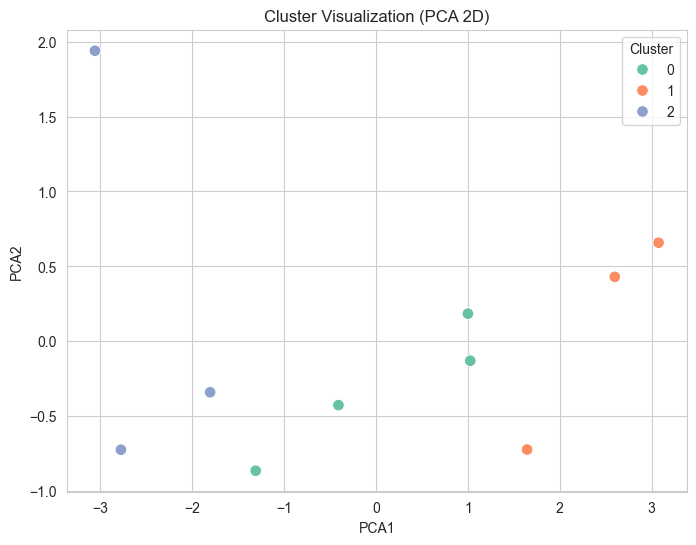

In [16]:
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=70)
plt.title("Cluster Visualization (PCA 2D)")
plt.show()


In [17]:
cluster_summary = df.groupby('Cluster')[num_df.columns].mean()
print(cluster_summary)


         student_id  study_hours  attendance  assignments_score  exam_score
Cluster                                                                    
0              4.75          5.5   82.500000          73.250000   73.500000
1              8.00          9.0   97.666667          89.000000   91.666667
2              4.00          2.0   60.000000          53.333333   48.333333


In [26]:
print(df.columns.tolist())


['student_id', 'study_hours', 'attendance', 'assignments_score', 'exam_score', 'Cluster']


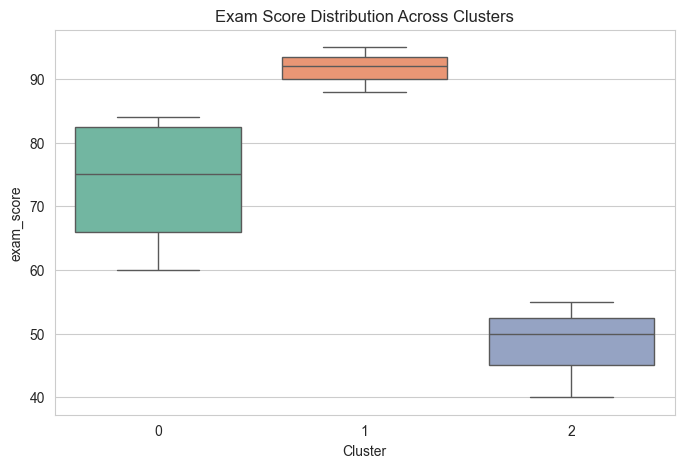

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='exam_score', data=df, palette='Set2')
plt.title("Exam Score Distribution Across Clusters")
plt.show()


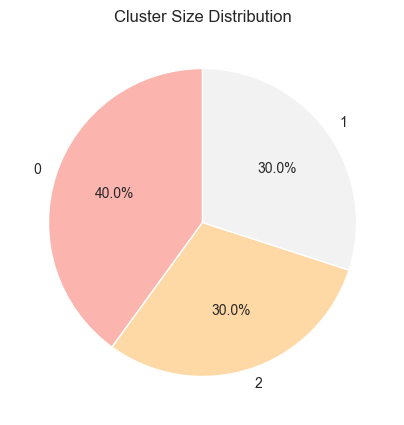

In [20]:
plt.figure(figsize=(5,5))
df['Cluster'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title("Cluster Size Distribution")
plt.ylabel("")
plt.show()


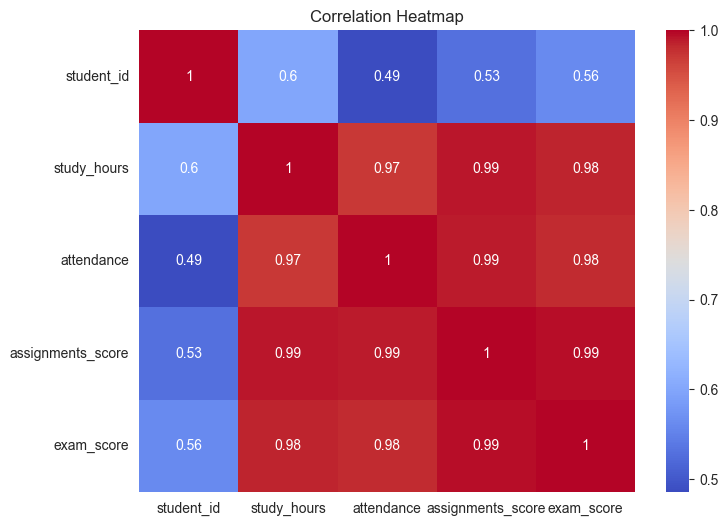

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [22]:
df.to_csv("clustered_student_data.csv", index=False)
print("✅ Clustered dataset saved as clustered_student_data.csv")


✅ Clustered dataset saved as clustered_student_data.csv


In [24]:
new_df = pd.read_csv("clustered_student_data.csv")
print("✅ Clustered dataset loaded successfully!")
new_df.head()


✅ Clustered dataset loaded successfully!


,student_id,study_hours,attendance,assignments_score,exam_score,Cluster
0,1,2,60,55,50,2
1,2,4,75,65,60,0
2,3,3,70,60,55,2
3,4,5,80,70,68,0
4,5,8,95,85,88,1


In [28]:
plt.savefig("visualizations/filename.png")


<Figure size 1000x600 with 0 Axes>